In [25]:
from datasets import load_dataset
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

In [28]:
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/gpt-neox-20b")

Downloading:   0%|          | 0.00/156 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.02M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

# Math

In [33]:
data = load_dataset("competition_math", ignore_verifications=True)

Using custom data configuration default
Reusing dataset competition_math (/home/zhangir/.cache/huggingface/datasets/competition_math/default/1.0.0/2a2a2995c2847186883ecd64f69be7d602b8a6f6b51950624d4dc2263f93333b)


  0%|          | 0/2 [00:00<?, ?it/s]

In [23]:
def dict_of_example(example): 
    return {
        "text": "Problem: "
        + example["problem"]
        + "\nAnswer: "
        + example["solution"],
        }

orig_cols = data['train'].column_names

data = data.map(dict_of_example)
text = data.remove_columns(orig_cols)

  0%|          | 0/7500 [00:00<?, ?ex/s]

  0%|          | 0/5000 [00:00<?, ?ex/s]

In [24]:
text["train"][0]

{'text': 'Problem: Let $S_i$ be the set of all integers $n$ such that $100i\\leq n < 100(i + 1)$. For example, $S_4$ is the set ${400,401,402,\\ldots,499}$. How many of the sets $S_0, S_1, S_2, \\ldots, S_{999}$ do not contain a perfect square?\n\nAnswer: The difference between consecutive squares is $(x + 1)^2 - x^2 = 2x + 1$, which means that all squares above $50^2 = 2500$ are more than $100$ apart.\nThen the first $26$ sets ($S_0,\\cdots S_{25}$) each have at least one perfect square. Also, since $316^2 < 100000$ (which is when $i = 1000$), there are $316 - 50 = 266$ other sets after $S_{25}$ that have a perfect square.\nThere are $1000 - 266 - 26 = \\boxed{708}$ sets without a perfect square.'}

  0%|          | 0/7500 [00:00<?, ?ex/s]

  0%|          | 0/5000 [00:00<?, ?ex/s]

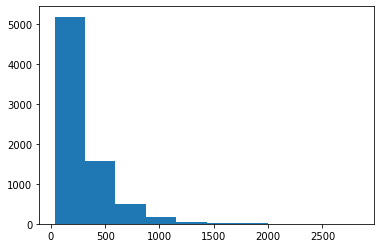

2836


In [32]:
from itertools import chain
lengths = []

text = text.map(lambda x: {"length": len(tokenizer(x["text"])["input_ids"])})

lengths = [x["length"] for x in text["train"]]
plt.hist(lengths)
plt.title("MATH token lengths")
plt.show()
print(max(lengths))


# GSM8k

In [34]:
data = load_dataset("gsm8k", "main")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/7473 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1319 [00:00<?, ? examples/s]

Dataset gsm8k downloaded and prepared to /home/zhangir/.cache/huggingface/datasets/gsm8k/main/1.1.0/37bfb08b1d4fcbb01f06b03d9e1ef5f1fcbd4d3af3d08842c50d7305091285ba. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [35]:
def dict_of_example(example): 
    return {
        "text": "Question: "
        + example["question"]
        + "\nAnswer: "
        + example["answer"],
        }

orig_cols = data['train'].column_names

data = data.map(dict_of_example)
text = data.remove_columns(orig_cols)

  0%|          | 0/7473 [00:00<?, ?ex/s]

  0%|          | 0/1319 [00:00<?, ?ex/s]

In [36]:
text["train"][0]

{'text': 'Question: Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?\nAnswer: Natalia sold 48/2 = <<48/2=24>>24 clips in May.\nNatalia sold 48+24 = <<48+24=72>>72 clips altogether in April and May.\n#### 72'}

  0%|          | 0/7473 [00:00<?, ?ex/s]

  0%|          | 0/1319 [00:00<?, ?ex/s]

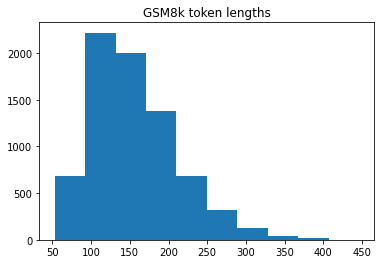

446


In [37]:
lengths = []

text = text.map(lambda x: {"length": len(tokenizer(x["text"])["input_ids"])})

lengths = [x["length"] for x in text["train"]]
plt.hist(lengths)
plt.title("GSM8k token lengths")
plt.show()
print(max(lengths))
